# **Task 3**

## **DJS Synapse Learning Period**
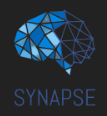

In the task for this week, we will be exploring another machine learning model called the decision tree classifier. We will also learn hyperparameter tuning using ensemble methods(Bagging & Boosting) and Decision Tree Pruning. 

# Decision Tree Classifier

<b>read the titanic_data.csv using pandas and show the dataframe</b>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/synapse_w3/titanic_data.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.shape

(891, 12)

<b>Write a function which accepts a dataframe, preprocesses the data (use task 1 notebook) and returns a new dataframe. </b> <br>
you may need a helper function for normalizing data so feel free to define that as well

In [ ]:
def titanic_preprocessing_pipeline(df):

  # Adding title
  title_list = []
  for i in df["Name"]:
    title_search = re.search('(\w+)\.', i)
    if title_search:
      title = title_search.group(1)
      title_list.append(title)
  df["Title"] = title_list

  df.drop(["PassengerId", "Ticket", "Name", "Cabin"], axis=1, inplace=True)
  
  df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)
  df["Age"].fillna(df["Age"].mean(), inplace=True)

  # Replacing SibSp and Parch by Family_members
  df['Family_members'] = df.SibSp + df.Parch
  
  # Applying normalisation on the columns
  col_list = ["Age", "Fare", "Family_members"]
  for i in col_list:
    max_val = df[i].max()
    min_val = df[i].min()
    df[i] = (df[i] - min_val) / (max_val - min_val)

  df = pd.get_dummies(data=df, columns=["Pclass", "Sex", "Title", "Embarked"])

  return df


In [ ]:
df = titanic_preprocessing_pipeline(df)

df

,Survived,Age,SibSp,Parch,Fare,Family_members,Pclass_1,Pclass_2,Pclass_3,Sex_female,...,Title_Mlle,Title_Mme,Title_Mr,Title_Mrs,Title_Ms,Title_Rev,Title_Sir,Embarked_C,Embarked_Q,Embarked_S
0,0,0.271174,1,0,0.014151,0.1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
1,1,0.472229,1,0,0.139136,0.1,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,1,0.321438,0,0,0.015469,0.0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,1,0.434531,1,0,0.103644,0.1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
4,0,0.434531,0,0,0.015713,0.0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0.334004,0,0,0.025374,0.0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
887,1,0.233476,0,0,0.058556,0.0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
888,0,0.367921,1,2,0.045771,0.3,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
889,1,0.321438,0,0,0.058556,0.0,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0


<b>extract the y label (survived) from the dataframe and store it in a new variable</b>

In [ ]:
y = df.Survived

<b>remove the y_label (survived) from the dataframe</b>

In [ ]:
df.drop(["Survived"], axis = 1, inplace = True)

<b>Split the data into train and test. (do a split in the ratio 70:30)</b>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3, random_state=123)

<b>Now that you have the entire preprocessed and split data, implement the decision tree algorithm from sklearn and fit it to this dataset</b> <br>



In [ ]:
print(y_train.value_counts(normalize = True))
print(y_test.value_counts(normalize = True))

0    0.608347
1    0.391653
Name: Survived, dtype: float64
0    0.634328
1    0.365672
Name: Survived, dtype: float64


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state = 156)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=156)

<b>print the test accuracy and train accuracy here</b>

In [ ]:
dt_model.score(X_train, y_train)

0.9887640449438202

In [ ]:
dt_model.score(X_test, y_test)

0.7761194029850746

Now that you have your first result, make sure that you play with the hyperparameters to get a better result. Visualize results, try different hyperparameters by using a loop, GET CREATIVE!<br>

Machine learning is an iteritive process. You will have to keep playing with hyperparameters and algorithms. No fixed algorithm will work on a fixed dataset.

Take this up as a challenge. The person with the best accuracy wins the round!

In [ ]:
dt_model.predict(X_test)
dt_model.predict_proba(X_test)

In [ ]:
y_pred = dt_model.predict_proba(X_test)[:,1]

new_y = []
for i in range(len(y_pred)):
  if y_pred[i] < 0.6:
    new_y.append(0)
  else:
    new_y.append(1)

accuracy_score(y_test, new_y)

# This doesn't give better accuracy as the probabilities are more than 0.85;
# and if constraint is kept as 0.85, then the accuracy drops

0.7761194029850746

In [ ]:
# Changing max_depth

train_accuracy = []
test_accuracy = []
for depth in range(1, 16):
  dt_model = DecisionTreeClassifier(max_depth = depth, random_state = 156)
  dt_model.fit(X_train, y_train)
  train_accuracy.append(dt_model.score(X_train, y_train))
  test_accuracy.append(dt_model.score(X_test, y_test))

In [ ]:
print(train_accuracy)
print(test_accuracy)

[0.7865168539325843, 0.7865168539325843, 0.8250401284109149, 0.8394863563402889, 0.8619582664526485, 0.8731942215088283, 0.8908507223113965, 0.9020866773675762, 0.9197431781701445, 0.9406099518459069, 0.9534510433386838, 0.9630818619582665, 0.971107544141252, 0.9759229534510433, 0.9791332263242376]
[0.7723880597014925, 0.7723880597014925, 0.8134328358208955, 0.8246268656716418, 0.835820895522388, 0.835820895522388, 0.8283582089552238, 0.8283582089552238, 0.835820895522388, 0.7947761194029851, 0.7873134328358209, 0.7686567164179104, 0.7798507462686567, 0.7910447761194029, 0.7835820895522388]


In [ ]:
score_df = pd.DataFrame({'max_depth':range(1,16), 'train_acc': train_accuracy, 'test_acc': test_accuracy})
score_df.head()

,max_depth,train_acc,test_acc
0,1,0.786517,0.772388
1,2,0.786517,0.772388
2,3,0.825040,0.813433
3,4,0.839486,0.824627
4,5,0.861958,0.835821


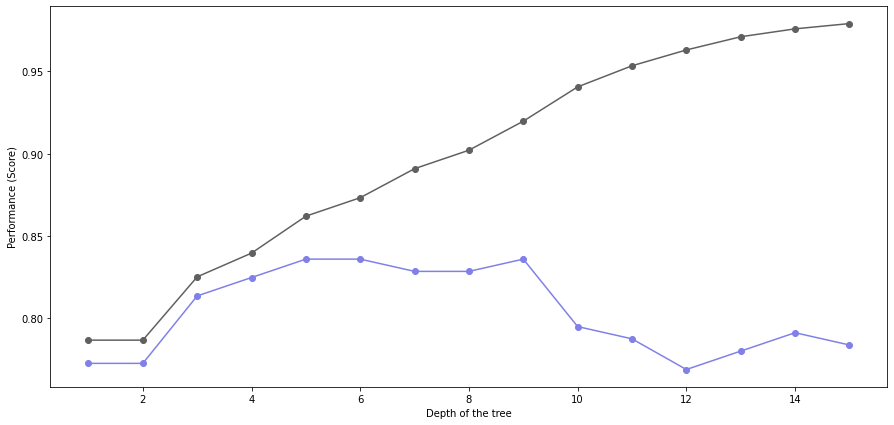

In [ ]:
plt.figure(figsize = (15,7))
plt.plot(score_df['max_depth'], score_df['train_acc'], marker = 'o', color = '#606060')
plt.plot(score_df['max_depth'], score_df['test_acc'], marker = 'o', color = '#8080e8')
plt.xlabel('Depth of the tree')
plt.ylabel('Performance (Score)')
plt.show()

In [ ]:
# 'max_depth = 9' gives the best score
dt_model = DecisionTreeClassifier(max_depth = 9, random_state = 156)
dt_model.fit(X_train, y_train)
print(round(dt_model.score(X_train, y_train), 3))
print(round(dt_model.score(X_test, y_test), 3))

0.92
0.836


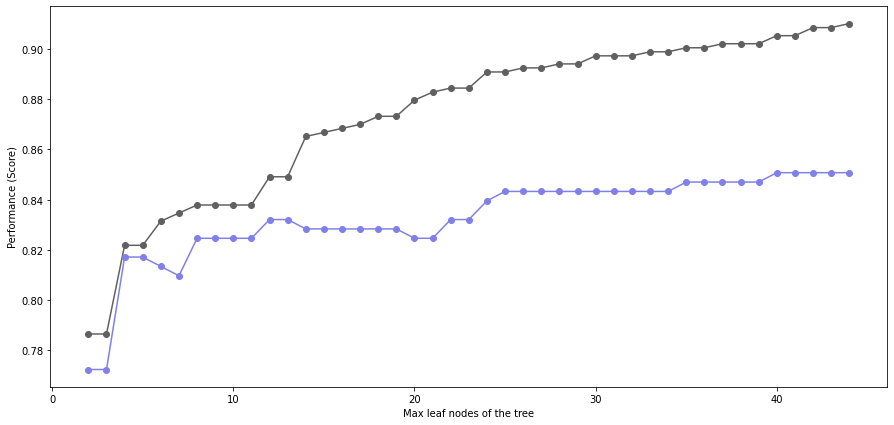

In [ ]:
# Changing max_leaf_nodes

train_accuracy = []
test_accuracy = []
for leaf in range(2, 45):
  dt_model = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes= leaf, random_state = 156)
  dt_model.fit(X_train, y_train)
  train_accuracy.append(dt_model.score(X_train, y_train))
  test_accuracy.append(dt_model.score(X_test, y_test))

# print(train_accuracy)
# print(test_accuracy)

score_df = pd.DataFrame({'max_leaf_nodes':range(2,45), 'train_acc': train_accuracy, 'test_acc': test_accuracy})

plt.figure(figsize = (15,7))
plt.plot(score_df['max_leaf_nodes'], score_df['train_acc'], marker = 'o', color = '#606060')
plt.plot(score_df['max_leaf_nodes'], score_df['test_acc'], marker = 'o', color = '#8080e8')
plt.xlabel('Max leaf nodes of the tree')
plt.ylabel('Performance (Score)')
plt.show()

In [ ]:
# 'max_leaf_nodes = 40' gives the best score
dt_model = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes = 40, random_state = 156)
dt_model.fit(X_train, y_train)
print(round(dt_model.score(X_train, y_train), 3))
print(round(dt_model.score(X_test, y_test), 3))

0.905
0.851


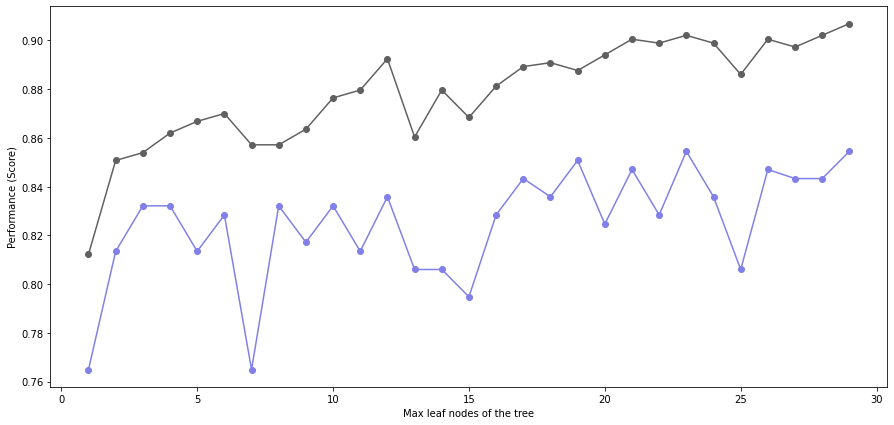

In [ ]:
# Changing max_features

train_accuracy = []
test_accuracy = []
for features in range(1, 30):
  dt_model = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes= 40, max_features= features, random_state = 156)
  dt_model.fit(X_train, y_train)
  train_accuracy.append(dt_model.score(X_train, y_train))
  test_accuracy.append(dt_model.score(X_test, y_test))

# print(train_accuracy)
# print(test_accuracy)

score_df = pd.DataFrame({'max_leaf_nodes':range(1, 30), 'train_acc': train_accuracy, 'test_acc': test_accuracy})

plt.figure(figsize = (15,7))
plt.plot(score_df['max_leaf_nodes'], score_df['train_acc'], marker = 'o', color = '#606060')
plt.plot(score_df['max_leaf_nodes'], score_df['test_acc'], marker = 'o', color = '#8080e8')
plt.xlabel('Max leaf nodes of the tree')
plt.ylabel('Performance (Score)')
plt.show()

In [93]:
dt_model = DecisionTreeClassifier(max_depth = 9, max_leaf_nodes = 40,max_features = 23, random_state = 156)
dt_model.fit(X_train, y_train)
print(round(dt_model.score(X_train, y_train), 3))
print(round(dt_model.score(X_test, y_test), 3))

0.902
0.854


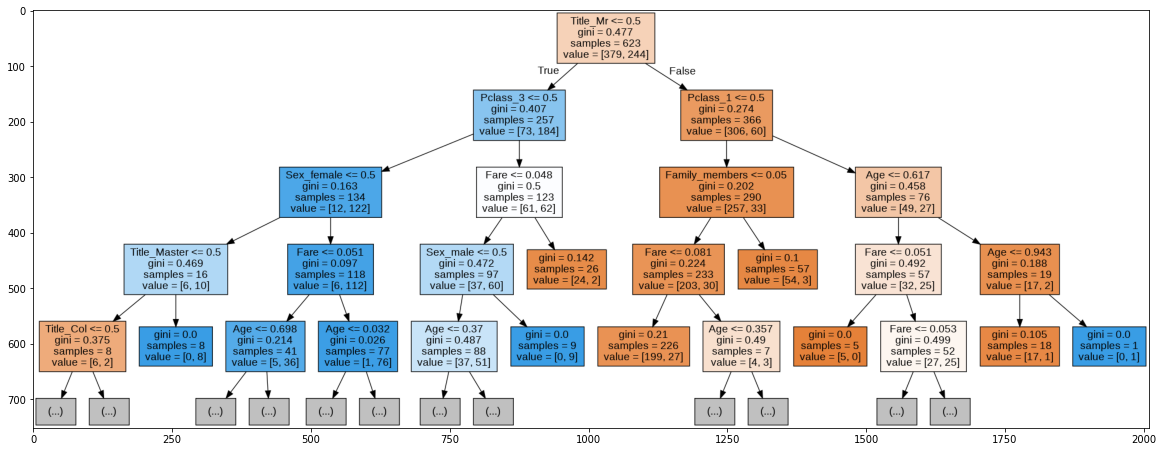

In [94]:
decision_tree  = tree.export_graphviz(dt_model, out_file = 'tree.dot', feature_names = X_train.columns, max_depth = 4, filled = True)

!dot -Tpng tree.dot -o tree.png

image = plt.imread('tree.png')
plt.figure(figsize = (20,15))
plt.imshow(image)

## Optimizing Methods

We can even use Ensemble Methods like **bagging (random forest)**, **boosting (adaboost)** and **Pruning** to improve your accuracy. Again creating a loop of hyperparameters and then finding the best among them is a daunting task. To reduce the efforts, we can use a special technique known as **GridSearchCV**. It finds the best hyperparameters for your model without you having to write multiple loops and evaluating them.

1. GridSearchCV for Random Forest Classifier: https://youtu.be/c4mS7KaOIGY
2. GridSearchCV for Adaboost Classifier: https://youtu.be/JmXnztjULnQ

### 1. Bagging

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)

In [ ]:
false_pos, true_pos, tresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_pos, true_pos)
roc_auc

0.7828331332533014

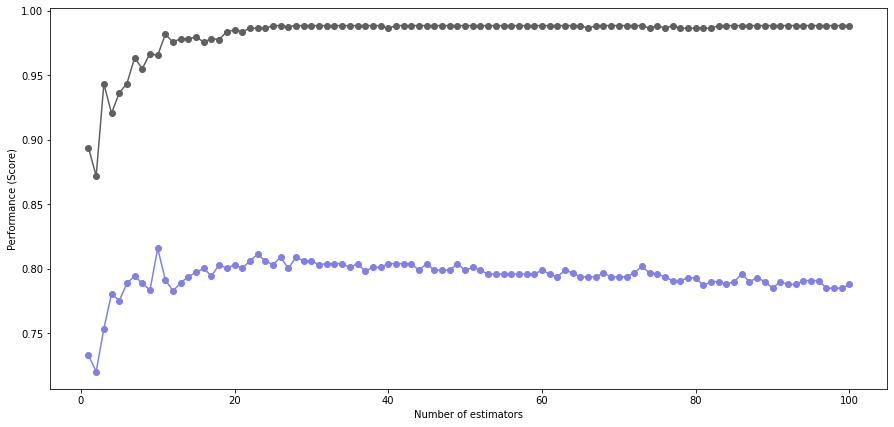

In [110]:
train_acc = []
test_acc = []

for i in range(1,101):
  rf = RandomForestClassifier(n_estimators= i, random_state = 156)
  rf.fit(X_train, y_train)
  train_pred = rf.predict(X_train)
  false_pos, true_pos, thresholds = roc_curve(y_train, train_pred)
  roc_auc = auc(false_pos, true_pos)
  train_acc.append(roc_auc)
  test_pred = rf.predict(X_test)
  false_pos, true_pos, thresholds = roc_curve(y_test, test_pred)
  roc_auc = auc(false_pos, true_pos)
  test_acc.append(roc_auc)

score_df = pd.DataFrame({'n_estimators':range(1,101), 'train_acc': train_acc, 'test_acc': test_acc})

plt.figure(figsize = (15,7))
plt.plot(score_df['n_estimators'], score_df['train_acc'], marker = 'o', color = '#606060')
plt.plot(score_df['n_estimators'], score_df['test_acc'], marker = 'o', color = '#8080e8')
plt.xlabel('Number of estimators')
plt.ylabel('Performance (Score)')
plt.show()

In [ ]:
test_acc.index(max(test_acc))

9

In [ ]:
rf = RandomForestClassifier(n_estimators= 10, random_state = 156)
rf.fit(X_train, y_train)
train_pred = rf.predict(X_train)
false_pos, true_pos, thresholds = roc_curve(y_train, train_pred)
train_accuracy = auc(false_pos, true_pos)

test_pred = rf.predict(X_test)
false_pos, true_pos, thresholds = roc_curve(y_test, test_pred)
test_accuracy = auc(false_pos, true_pos)

print(train_accuracy)
print(test_accuracy)

0.965445088455383
0.8157863145258104


In [ ]:
# Using GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [2,4,9]
min_samples_split = [2,5]
min_samples_leaf = [1,2]
bootstrap = [True, False]

param_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap, 'random_state': [156]}
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4, 9], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False], 'random_state': [156]}


In [ ]:
rf_model = RandomForestClassifier()
rf_Grid  = GridSearchCV(estimator = rf_model, param_grid = param_grid, cv=3, verbose = 2,  n_jobs =  4)
rf_Grid.fit(X_train, y_train)

Fitting 3 folds for each of 480 candidates, totalling 1440 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4, 9],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80],
                         'random_state': [156]},
             verbose=2)

In [ ]:
rf_Grid.best_params_

{'bootstrap': True,
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 72,
 'random_state': 156}

In [160]:
rf = RandomForestClassifier(random_state = 156, bootstrap= True, max_depth= 9, max_features= 'auto', min_samples_leaf= 2, min_samples_split= 5, n_estimators= 72)
rf.fit(X_train, y_train)

train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print('Train accuracy', round(accuracy_score(y_train, train_pred), 3))
print('Test accuracy ', round(accuracy_score(y_test, test_pred), 3))

Train accuracy 0.872
Test accuracy  0.843


### 2. Boosting

In [76]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression

In [75]:
ada_model = AdaBoostClassifier(n_estimators= 100, learning_rate = 1)
model = ada_model.fit(X_train, y_train)
y_pred =  model.predict(X_test)
round(accuracy_score(y_test, y_pred),3)

0.84

In [78]:
# Using logistic regression
log_model = LogisticRegression()
ada_log_model = AdaBoostClassifier(n_estimators= 50, base_estimator= log_model,learning_rate =1)
model = ada_log_model.fit(X_train, y_train)
y_pred =  model.predict(X_test)
round(accuracy_score(y_test, y_pred),3)

# It has lesser accuracy

0.825

In [122]:
# Using GridSearchCV

n_estimators = [10, 50, 100, 250, 347, 500]
grid = {'n_estimators': n_estimators, 'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0], 'algorithm': ['SAMME', 'SAMME.R']}

grid_search = GridSearchCV(estimator = AdaBoostClassifier(), param_grid = grid, n_jobs = -1, cv = 10, scoring = 'accuracy')

grid_result = grid_search.fit(X_train, y_train)

print(grid_result.best_params_)
print(grid_result.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}
0.8235535074244751


In [120]:
model = AdaBoostClassifier(base_estimator = AdaBoostClassifier(), algorithm = 'SAMME', learning_rate = 1.0, n_estimators = 100)
model.fit(X_train, y_train)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

print(accuracy_score(y_train, train_pred))
print(accuracy_score(y_test, test_pred))

0.898876404494382
0.8097014925373134


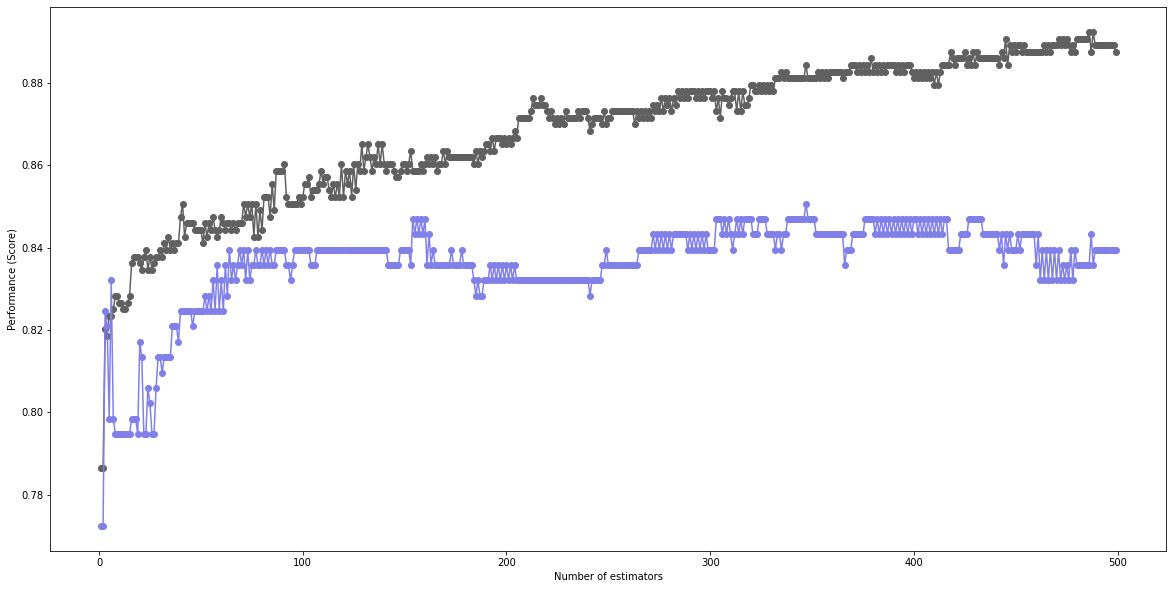

In [114]:
# Changing n_estimators in the original AdaBoostClassifier

train_acc = []
test_acc = []

for i in range(1,500):
  ada_model = AdaBoostClassifier(n_estimators= i, learning_rate = 1)
  model = ada_model.fit(X_train, y_train)

  train_pred = model.predict(X_train)
  test_pred = model.predict(X_test)

  train_acc.append(accuracy_score(y_train, train_pred))
  test_acc.append(accuracy_score(y_test, test_pred))

score_df = pd.DataFrame({'n_estimators':range(1,500), 'train_acc': train_acc, 'test_acc': test_acc})

plt.figure(figsize = (20,10))
plt.plot(score_df['n_estimators'], score_df['train_acc'], marker = 'o', color = '#606060')
plt.plot(score_df['n_estimators'], score_df['test_acc'], marker = 'o', color = '#8080e8')
plt.xlabel('Number of estimators')
plt.ylabel('Performance (Score)')
plt.show()

In [116]:
test_acc.index(max(test_acc))

346

In [162]:
ada_model = AdaBoostClassifier(n_estimators= 347, learning_rate = 1)
model = ada_model.fit(X_train, y_train)

train_pred = rf.predict(X_train)
test_pred = rf.predict(X_test)

print('Train Accuracy', round(accuracy_score(y_train, train_pred), 3))
print('Test Accuracy ', round(accuracy_score(y_test, test_pred), 3))

Train Accuracy 0.872
Test Accuracy  0.843


### 3. Pruning Techniques

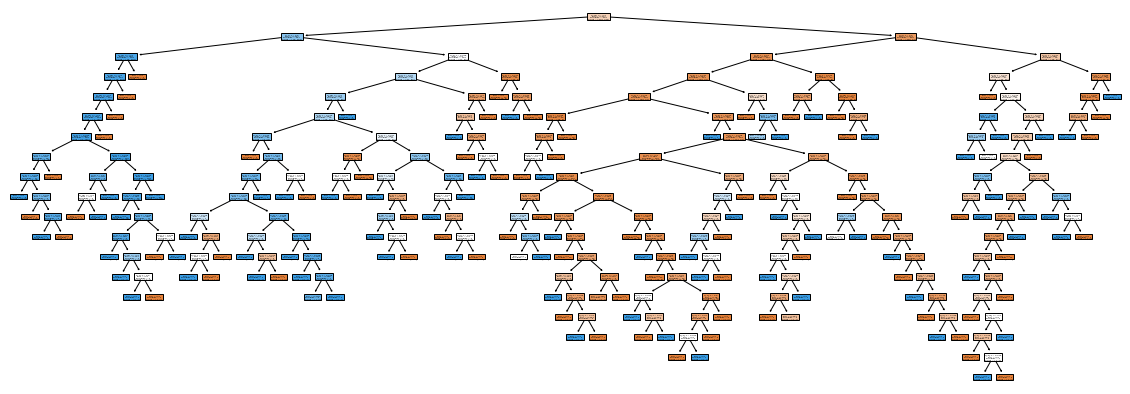

In [124]:
model = DecisionTreeClassifier(random_state = 156)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(accuracy_score(y_test,pred))

plt.figure(figsize = (20, 7))
tree.plot_tree(model, filled = True)

In [128]:
path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [131]:
models = []
for i in ccp_alphas:
  model = DecisionTreeClassifier(random_state = 156, ccp_alpha = i)
  model.fit(X_train, y_train)
  models.append(model)
print(models[-1].tree_.node_count)
print(ccp_alphas[-1])

1
0.14769846306528467


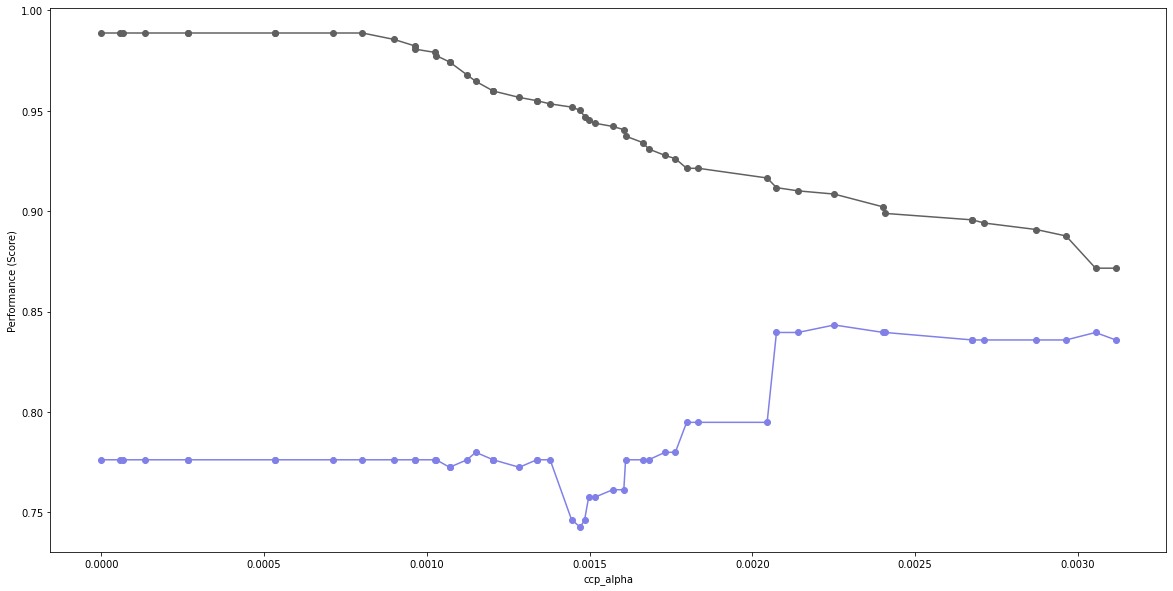

In [140]:
train_scores = [model.score(X_train, y_train) for model in models]
test_scores = [model.score(X_test, y_test) for model in models]

plt.figure(figsize = (20,10))
plt.plot(ccp_alphas[:-10], train_scores[:-10], marker = 'o', color = '#606060')
plt.plot(ccp_alphas[:-10], test_scores[:-10], marker = 'o', color = '#8080e8')
plt.xlabel('ccp_alpha')
plt.ylabel('Performance (Score)')
plt.show()

In [151]:
print(ccp_alphas[-12])
 
print('Train accuracy ', round(train_scores[51], 3))
print('Test accuracy  ', round(test_scores[51],3))

0.0030538314572806343
Train accuracy  0.872
Test accuracy   0.84


0.84


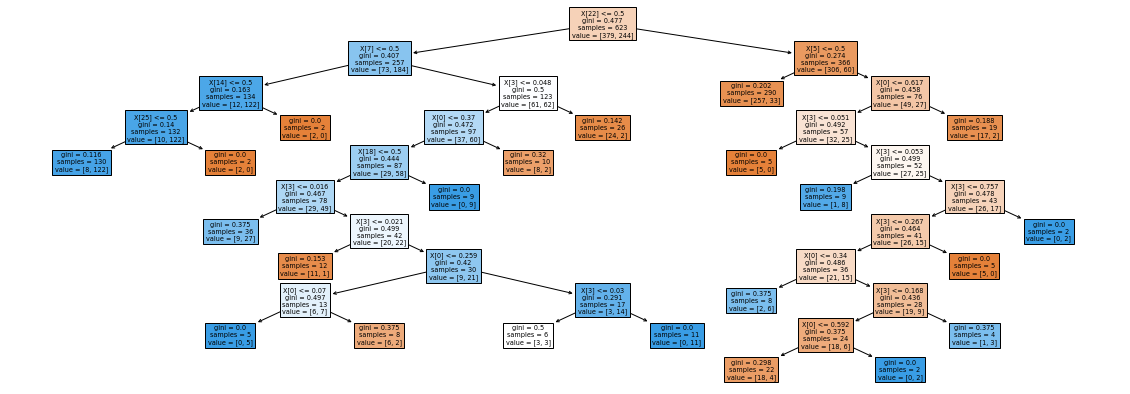

In [158]:
model = DecisionTreeClassifier(random_state = 156, ccp_alpha= 0.0030538)
model.fit(X_train, y_train)
pred = model.predict(X_test)
print(round(accuracy_score(y_test,pred), 2))

plt.figure(figsize = (20, 7))
tree.plot_tree(model, filled = True)
plt.show()

## Optimal model

After studying these techniques, analyse which method gives you the best accuracy and choose it as your final model.


All three of the techniques give similar train and test accuracy values. I choose bagging because it easily improves its accuracy when the hyper parameters are tweaked.

<b>Note that the accuracy on the test set will be considered and brownie points for *not* overfitting the model in the process</b>

# **Bonus: To be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Naive Bayes Algortihm**. The best research will be edited and featured on the Synapse Instagram page. Happy coding! :)

# **End of Task**

> ©DJS Synapse 2022 - 2023